In [1]:
from read_data import *
import matplotlib.pyplot as plt
from losses import *

from models.ensemble import Ensemble
from models.dropout import Dropout
from models.evidental import Evidental

2023-06-19 16:54:52.966237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 16:54:53.015824: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-19 16:54:53.016921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
x_train, y_train = get_synth_data(-4, 4, n=1000, train=True)
x_test, y_test = get_synth_data(-4, 4, n=1000, train=True)

x_plot, y_plot = get_synth_data(-7, 7, n=100, train=True)


#x_train, x_train_mu, x_train_scale = standardize(x_train)
#x_test = (x_test - x_train_mu) / x_train_scale

#x_plot = (x_plot - x_train_mu) / x_train_scale

#y_train, y_train_mu, y_train_scale = standardize(y_train)
#y_test = (y_test - y_train_mu) / y_train_scale
#y_plot = (y_plot - y_train_mu) / y_train_scale
#x_train, y_train, x_test, y_test = load_boston(3)
#x_train, y_train, x_test, y_test = load_concrete(i)

In [ ]:
Evi = Evidental(input_shape=x_train.shape[1:], num_neurons=128, num_layers=3, activation='gelu', learning_rate=3e-3, coeff=5e-1)
Drop = Dropout(input_shape=x_train.shape[1:], num_neurons=128, num_layers=3, activation='gelu', num_ensembles=5, learning_rate=3e-3)
Ense = Ensemble(input_shape=x_train.shape[1:], num_neurons=128, num_layers=3, activation='gelu', num_ensembles=5, learning_rate=3e-3)
print(Evi.drop_prob)
print(Drop.drop_prob)
print(Ense.drop_prob)

2023-06-19 12:35:19.713195: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-19 12:35:19.713697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-19 12:35:19.716094: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

0.1
0.1
0.1


In [ ]:
x_train[:].shape

(1000, 1)

In [ ]:
Drop.train(x_train, y_train, batch_size=128, epochs=1000)
Ense.train(x_train, y_train, batch_size=128, epochs=1000)
Evi.train(x_train, y_train, batch_size=128, epochs=1000)

Restoring model weights from the end of the best epoch: 87.
Epoch 137: early stopping
Restoring model weights from the end of the best epoch: 81.
Epoch 131: early stopping
Restoring model weights from the end of the best epoch: 70.
Epoch 120: early stopping
Restoring model weights from the end of the best epoch: 91.
Epoch 141: early stopping
Restoring model weights from the end of the best epoch: 89.
Epoch 139: early stopping
Restoring model weights from the end of the best epoch: 81.
Epoch 131: early stopping
Restoring model weights from the end of the best epoch: 89.
Epoch 139: early stopping


In [ ]:
print("Evidence: ", Evi.evaluate(x_train, y_train))
print("Dropout: ", Drop.evaluate(x_train, y_train))
print("Ensemble: ", Ense.evaluate(x_train, y_train))

print("Evidence: ", Evi.evaluate(x_test, y_test))
print("Dropout: ", Drop.evaluate(x_test, y_test))
print("Ensemble: ", Ense.evaluate(x_test, y_test))

Evidence:  (1.5750811, 6.9116077, 0.006830692291259766)
Dropout:  (1.5807959, 6.92213, 0.0443270206451416)
Ensemble:  (1.5274416, 6.817657, 0.030429363250732422)
Evidence:  (1.42425, 6.6874757, 0.006723165512084961)
Dropout:  (1.4058076, 6.757495, 0.04526209831237793)
Ensemble:  (1.402886, 6.631676, 0.029532194137573242)


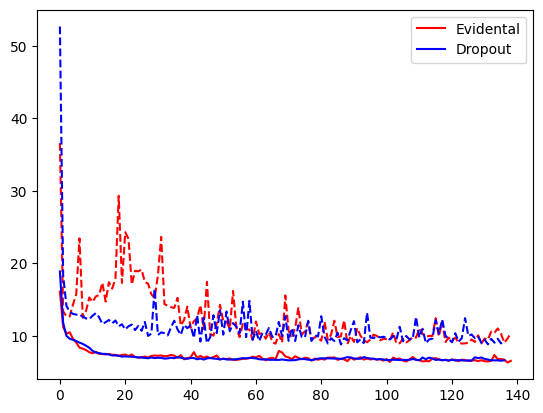

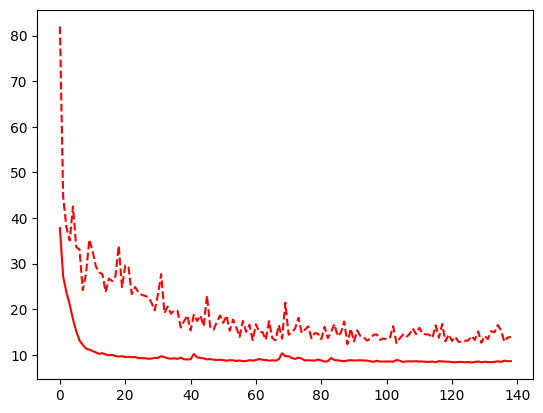

In [ ]:
plt.plot(Evi.history.history['val_nll_eval'], c='red', linestyle='--')
plt.plot(Evi.history.history['nll_eval'], c='red', label='Evidental')
plt.plot(Drop.history.history['val_loss'], c='blue', linestyle='--')
plt.plot(Drop.history.history['loss'], c='blue', label='Dropout')
#plt.plot(Ense.history[0].history['val_loss'], c='green', linestyle='--')
#plt.plot(Ense.history[0].hi
# story['loss'], c='green', label='Ensemble')
plt.legend()
plt.show()
plt.plot(Evi.history.history['val_loss'], c='red', linestyle='--')
plt.plot(Evi.history.history['loss'], c='red', label='Evidental')
plt.show()

In [ ]:
evi_preds = Evi.predict(x_test)
drop_preds = Drop.predict(x_test)
ense_preds = Ense.predict(x_test)

In [ ]:
print("Evidence")
for i, q in enumerate(Evi.quantiles):
    print("The q is {} model have {}".format(q, (y_test<tf.expand_dims(evi_preds[:,i],1)).numpy().mean()))

print("Dropout")
for i, q in enumerate(Evi.quantiles):
    print("The q is {} model have {}".format(q, (y_test<tf.expand_dims(drop_preds[:,i],1)).numpy().mean()))

print("Ensemble")
for i, q in enumerate(Evi.quantiles):
    print("The q is {} model have {}".format(q, (y_test<tf.expand_dims(ense_preds[:,i],1)).numpy().mean()))


Evidence
The q is 0.05 model have 0.032
The q is 0.95 model have 0.988
Dropout
The q is 0.05 model have 0.033
The q is 0.95 model have 0.97
Ensemble
The q is 0.05 model have 0.03
The q is 0.95 model have 0.988


In [ ]:
#print(tf.reduce_mean(y_test-tf.expand_dims(evi_preds[:,1],1)**2))
#print(tf.reduce_mean(y_test-tf.expand_dims(drop_preds[:,1],1)**2))
#print(tf.reduce_mean(y_test-tf.expand_dims(ense_preds[:,1],1)**2))

In [ ]:
#plt.figure(figsize=(10,10))
#plt.plot(y_test)
#plt.plot(evi_preds[:,0], label='Evidential')
#plt.scatter(y_test, evi_preds[:,2], label='Evidential')
#plt.scatter(y_test, drop_preds[:,2], label='Dropout')
#plt.scatter(y_test, ense_preds[:,2], label='Ensemble')
#plt.plot(y_test, y_test, label='Ground Truth')
#plt.legend()

In [ ]:
def plot_q(x_train, y_train, x_test, y_test, model):
    #mu, var_ = model.get_mu_sigma(x_test)
    mu = model.predict(x_test)
    var_ = model.get_uncertainties(x_test)
    for i, q in enumerate(model.quantiles):
        plot_predictions(x_train, y_train, x_test, y_test, mu[:,i], var=var_[:,i], quantile=q, n_stds=4, kk=i)

def plot_predictions(x_train, y_train, x_test, y_test, y_pred, var, quantile, n_stds=4, kk=0):
    x_test = x_test[:, 0]
    x_train = x_train[:, 0]
    #var = np.minimum(var, 1e3)  # for visualization


    plt.figure(figsize=(5, 3), dpi=200)
    plt.title("Quantile: {:.2f}".format(quantile))
    plt.scatter(x_train, y_train, s=1., c='#463c3c', zorder=0, label="Train")
    #plt.plot(x_test, y_test, 'r--', zorder=2, label="True")
    plt.scatter(x_test, y_test, c='r',s=1., zorder=2, label="True")
    plt.plot(x_test, y_pred, color='#007cab', zorder=3, label="Pred")
    #plt.plot(x_test, mu_z, color='green', zorder=3, label="Pred_or")
    #plt.plot(x_test, mu_z+2*std_z, color='green', linestyle='--', zorder=3, label="Pred_or")
    plt.plot([-4, -4], [-150, 150], 'k--', alpha=0.4, zorder=0)
    plt.plot([+4, +4], [-150, 150], 'k--', alpha=0.4, zorder=0)

    for k in np.linspace(0, n_stds, 4):
        #print(var.shape)
        #print(mu.shape)
        #print((k*var).shape)
        plt.fill_between(
            x_test, (y_pred - k * var), (y_pred + k * var),
            alpha=0.3,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
    plt.gca().set_ylim(-150, 150)
    #plt.gca().set_ylim(-5, 5)
    plt.gca().set_xlim(-7, 7)
    plt.legend(loc="upper left")
    plt.show()


Evidence


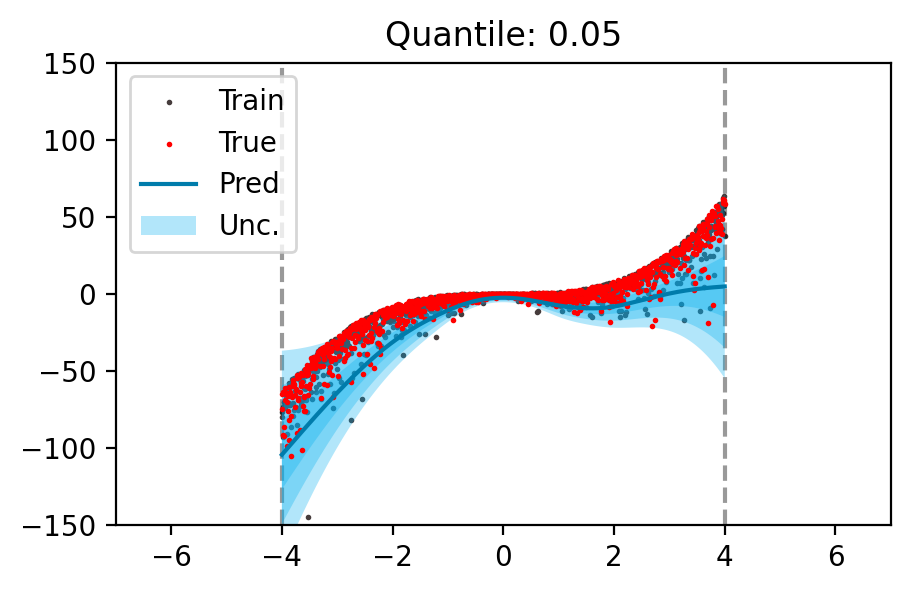

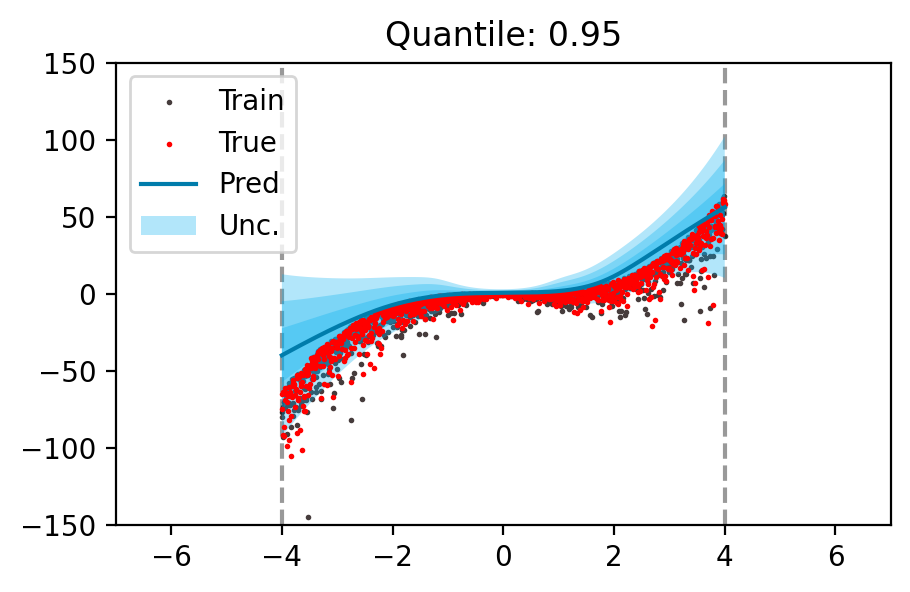

Dropout


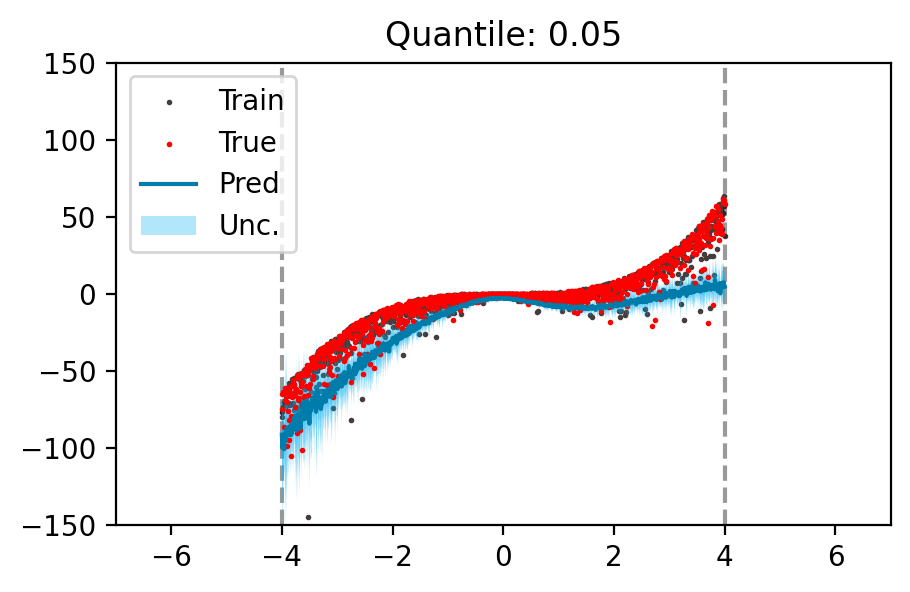

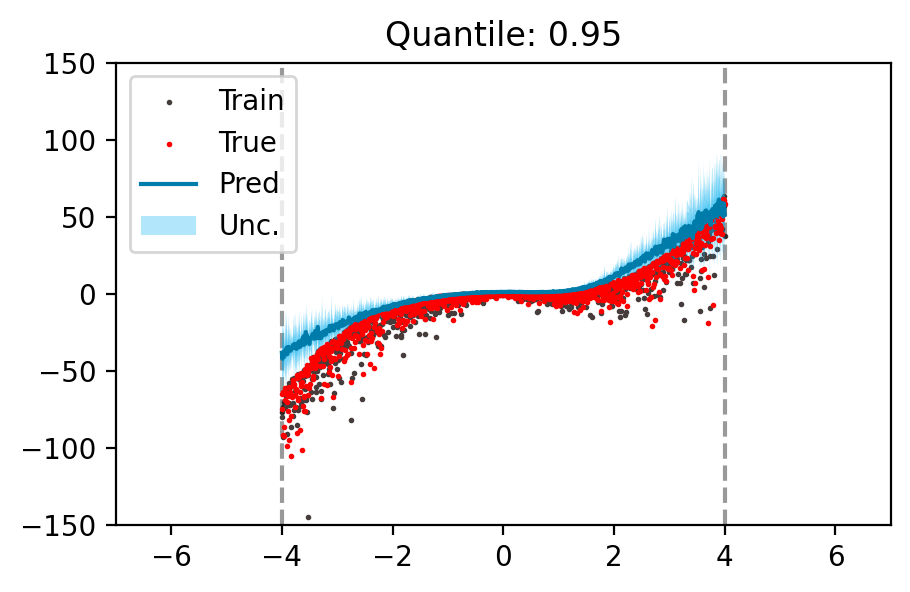

Ensemble


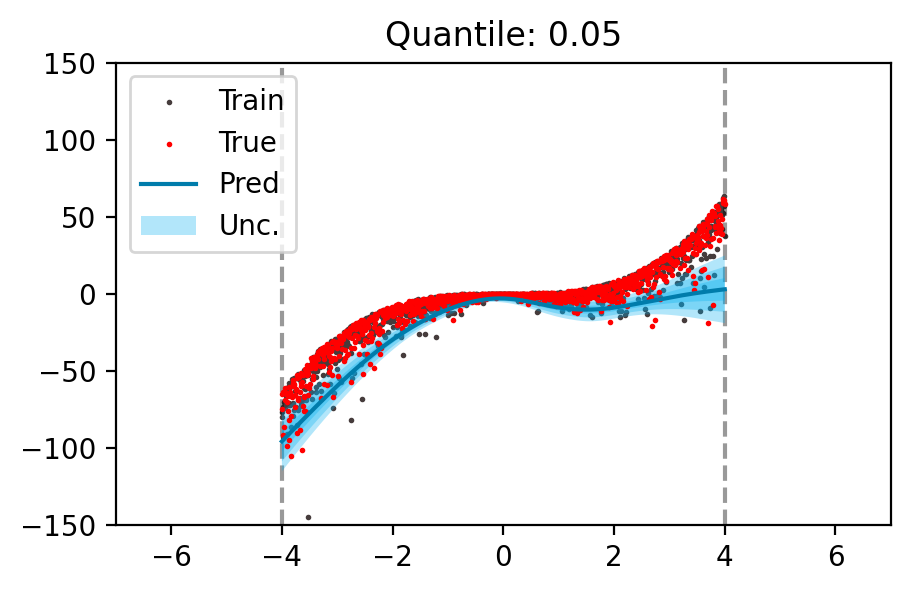

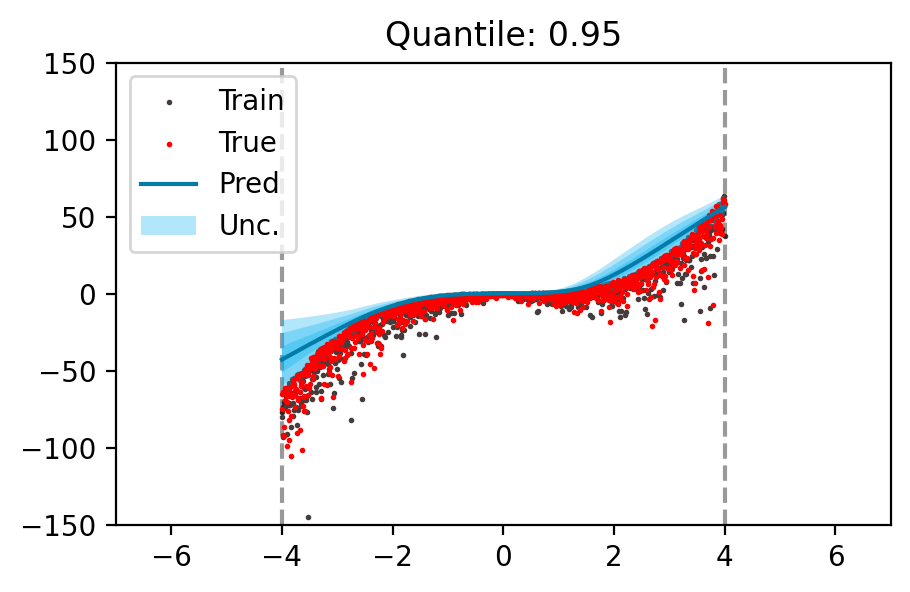

In [ ]:
print("Evidence")
plot_q(x_train, y_train, x_test, y_test, Evi)
print("Dropout")
plot_q(x_train, y_train, x_test, y_test, Drop)
print("Ensemble")
plot_q(x_train, y_train, x_test , y_test, Ense)


Evidence


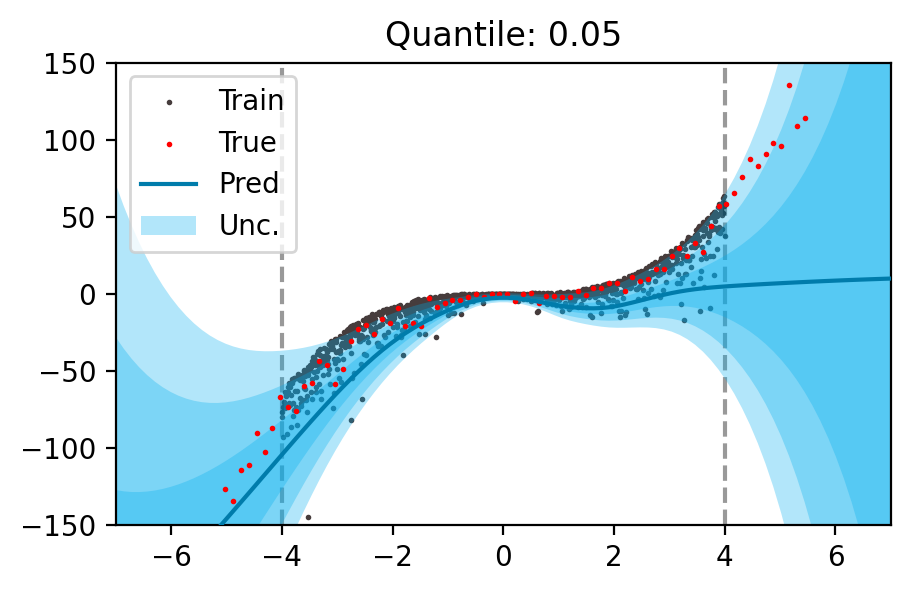

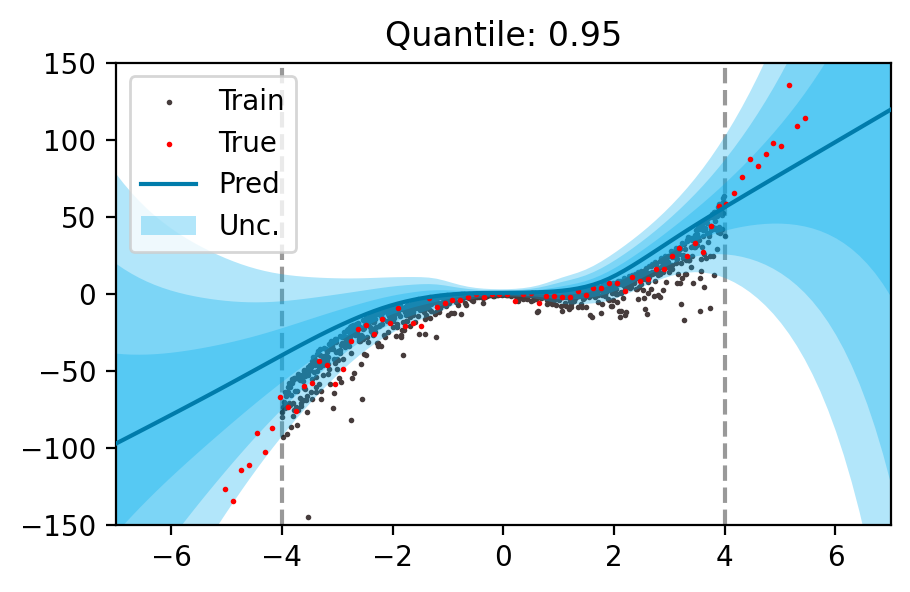

Dropout


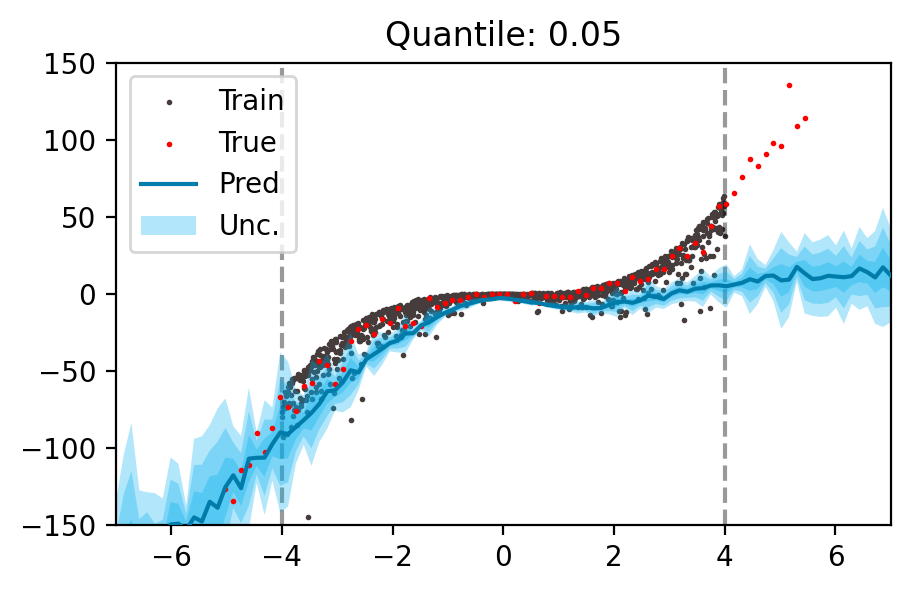

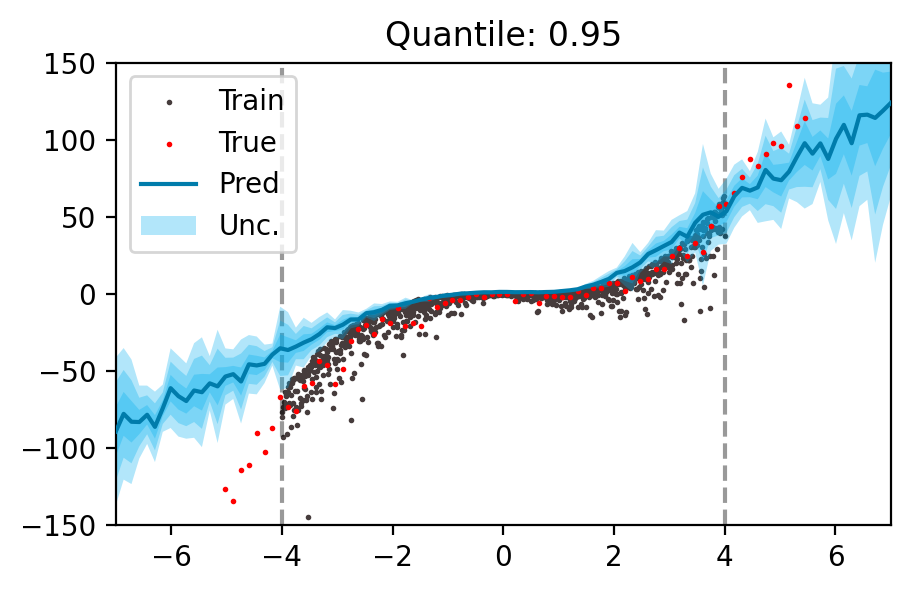

Ensemble


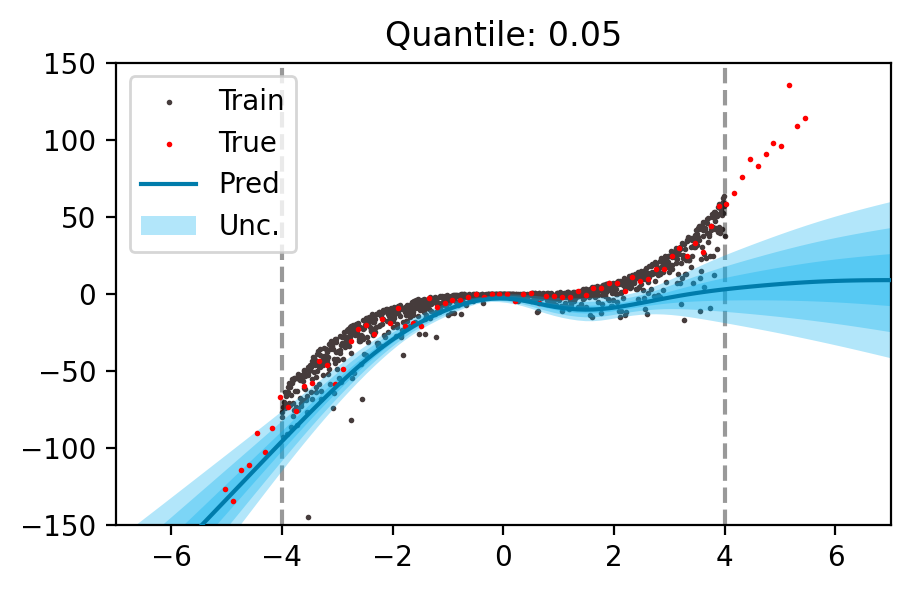

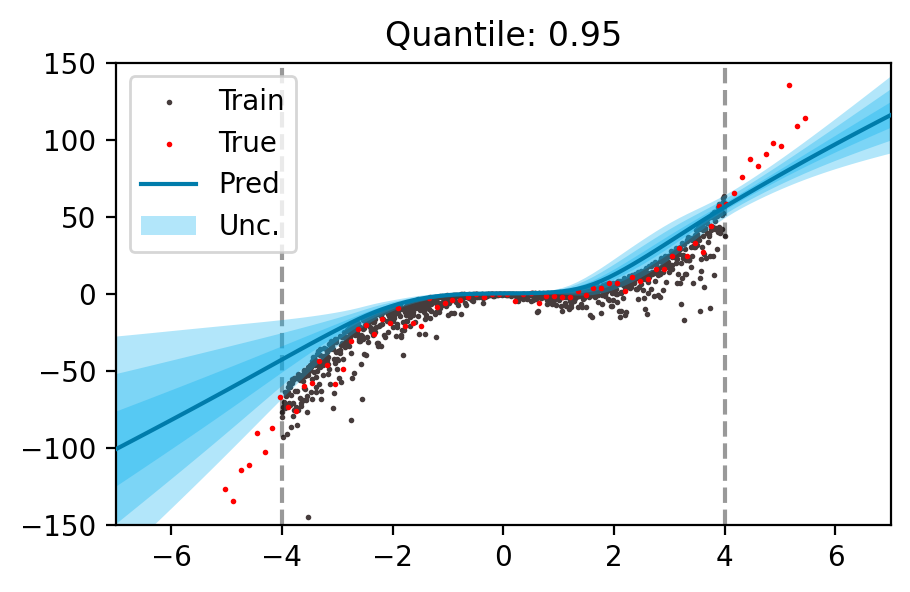

In [ ]:
print("Evidence")
plot_q(x_train, y_train, x_plot, y_plot, Evi)
print("Dropout")
plot_q(x_train, y_train, x_plot, y_plot, Drop)
print("Ensemble")
plot_q(x_train, y_train, x_plot, y_plot, Ense)

In [ ]:
output = Evi.model(x_test)

In [ ]:
gamma, v, alpha, beta = tf.split(output, 4, axis=-1)
#sigma = tf.math.sqrt(beta/(alpha-1))

In [ ]:
from losses import *
import tensorflow_probability as tfp
tfd = tfp.distributions

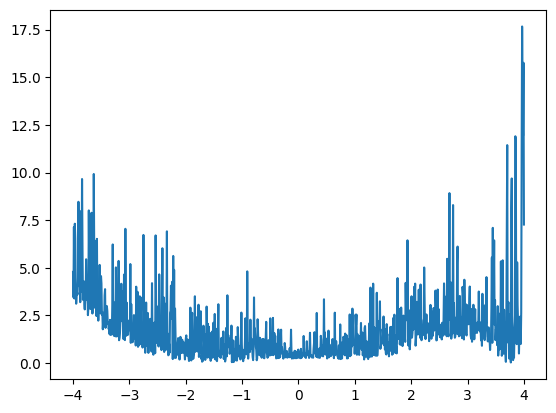

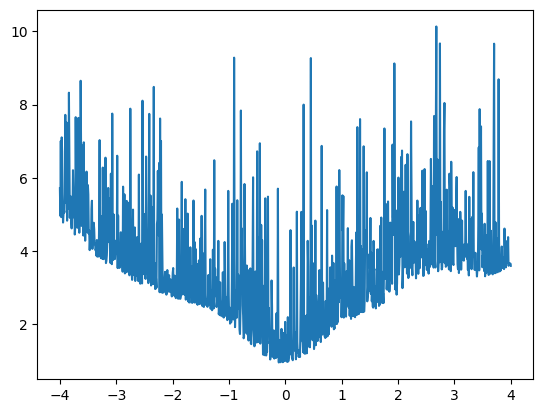

In [ ]:
i = -1
quantile = Evi.quantiles[i]
mean_ = tf.expand_dims(beta[:,i],1)/(tf.expand_dims(alpha[:,i],1)-1)
theta = (1.0-2.0*quantile)/(quantile*(1.0-quantile))
# create exponeital distribution from w_i
w_i_dis = tfd.Exponential(1/mean_)
mu = tf.expand_dims(gamma[:,i],1) + theta*w_i_dis.mean()
plt.plot(x_test, NIG_Reg(y_test, tf.expand_dims(gamma[:,i],1), tf.expand_dims(v[:,i],1), tf.expand_dims(alpha[:,i],1), tf.expand_dims(beta[:,i],1), w_i_dis, quantile, reduce=False))
plt.show()
plt.plot(x_test, NIG_NLL(y_test, tf.expand_dims(gamma[:,i],1), tf.expand_dims(v[:,i],1), tf.expand_dims(alpha[:,i],1), tf.expand_dims(beta[:,i],1), w_i_dis, quantile, reduce=False))

In [ ]:
x = np.arange(0.01, 1.0,0.01)

In [ ]:
theta = (1-2.0*x)/(x*(1-x))
tau = 2/(x*(1-x))

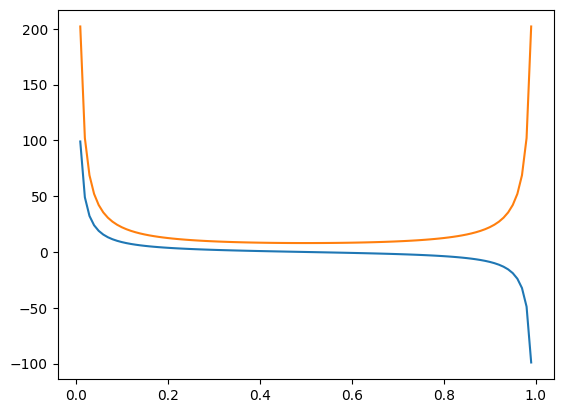

In [ ]:
plt.plot(x, theta)
plt.plot(x, tau)

In [ ]:
# create 2d array from 
n = 1000
x = tf.linspace(-4, 4, n)
X, Y = tf.meshgrid(x, x)
Z = tf.stack((X.numpy().flatten(), Y.numpy().flatten()), axis=-1)
Z = target_distribution("4")(Z)

NameError: name 'target_distribution' is not defined

In [ ]:
Y.shape

TensorShape([1000, 1000])

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

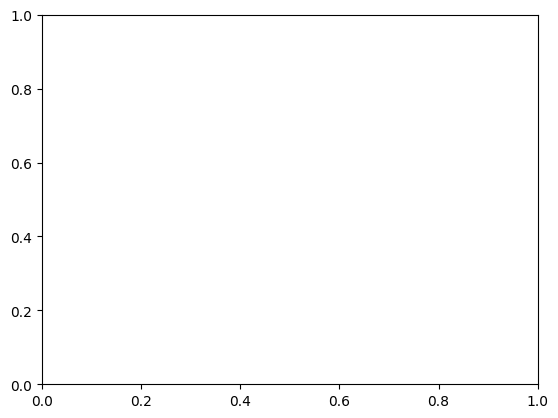

In [ ]:
ax = plt.subplot(111)
ax.pcolormesh(X, Y, cmap=plt.cm.jet, shading='auto')
ax.set_aspect(1.) #sets y-axis, x-axis ratio
plt.setp(ax, xticks=[], yticks=[])

In [ ]:
Y.numpy().flatten()

array([-4., -4., -4., ...,  4.,  4.,  4.])